In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg
import matplotlib as mpl


In [3]:
plt.style.use('../../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [4]:
S0_fid = jsm_ancillary.load_sample("../../data/S0_sample/radial_dependance/S0_fid.h5")
S0_off = jsm_ancillary.load_sample("../../data/S0_sample/radial_dependance/S0_off.h5")
S0_down = jsm_ancillary.load_sample("../../data/S0_sample/radial_dependance/S0_down.h5")
S0_up = jsm_ancillary.load_sample("../../data/S0_sample/radial_dependance/S0_up.h5")

In [113]:
def radial_distribution(sample, N_chunk, label):

    Rvir = 258.924 #kpc
    log_fR_bins = np.linspace(-1.5, 0, 25)
    bin_centers = (log_fR_bins[:-1] + log_fR_bins[1:]) / 2

    z50 = np.log10(1+sample["host_z50"].values)
    rmag_mat = jsm_ancillary.make_matrix(sample, "sat_final_rmag")
    fates = jsm_ancillary.make_matrix(sample, "sat_fates")

    rmag_mat = np.where(rmag_mat < Rvir, rmag_mat, np.nan)
    log_fR = np.log10(rmag_mat/Rvir)
    log_fR = np.where(fates == 1, log_fR, np.nan)

    earliest_to_latest = np.argsort(z50)
    
    z50 = z50[earliest_to_latest]
    count_mat = np.apply_along_axis(jsm_stats.radii_grthan, axis=1, arr=log_fR, bins=log_fR_bins)
    count_mat_sorted = count_mat[earliest_to_latest, :]

    count_split = np.split(count_mat_sorted, N_chunk)
    z50_split = np.array_split(z50, N_chunk)

    fig, ax = plt.subplots()

    plt.title(label)
    cmap = mpl.cm.cividis
    norm = mpl.colors.Normalize(vmin=z50.min(), vmax=z50.max())

    for selection, z_chunk in zip(count_split, z50_split):

        profile = np.nanmedian(selection, axis=0)
        z_color = np.nanmedian(z_chunk)

        ax.plot(
            bin_centers,
            profile,
            color=cmap(norm(z_color)),
            alpha=1
        )

    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('$\\log(1 + z_{50})$')
    
    ax.set_ylim(0,100)
    ax.set_xlim(log_fR_bins.min(), log_fR_bins.max())
    ax.set_ylabel('log $(N > \\mathcal{R})$')
    ax.set_xlabel('log [$\\mathcal{R} \\equiv r/R_{\\rm vir}$]')

    plt.show()

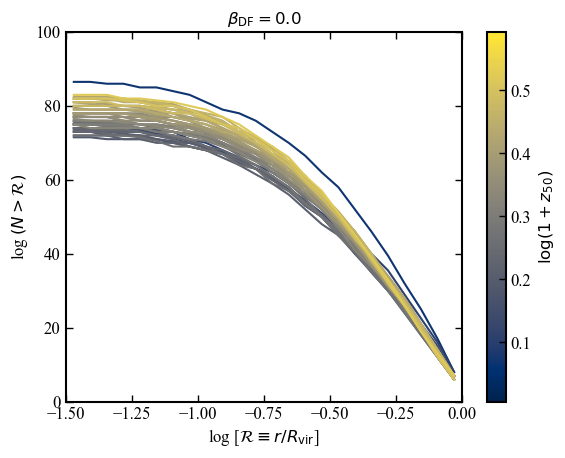

In [114]:
radial_distribution(S0_off, N_chunk=50, label="$\\beta_{\\rm DF} = 0.0$")

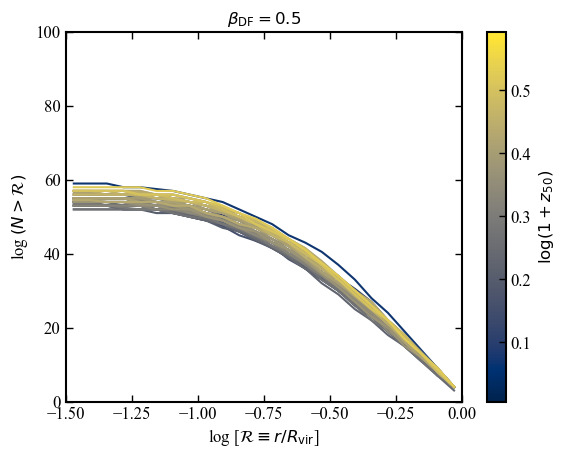

In [115]:
radial_distribution(S0_down, N_chunk=50, label="$\\beta_{\\rm DF} = 0.5$")

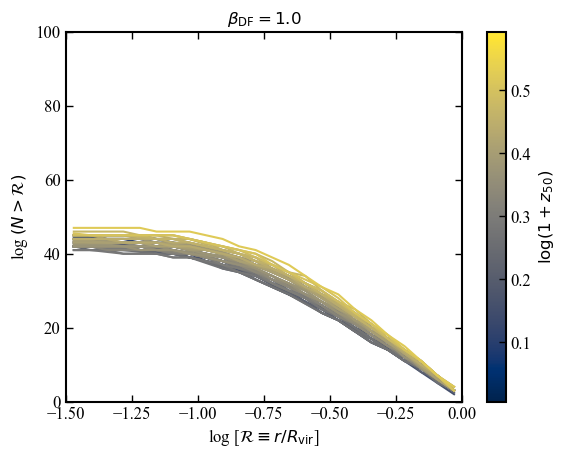

In [116]:
radial_distribution(S0_fid, N_chunk=50, label="$\\beta_{\\rm DF} = 1.0$")

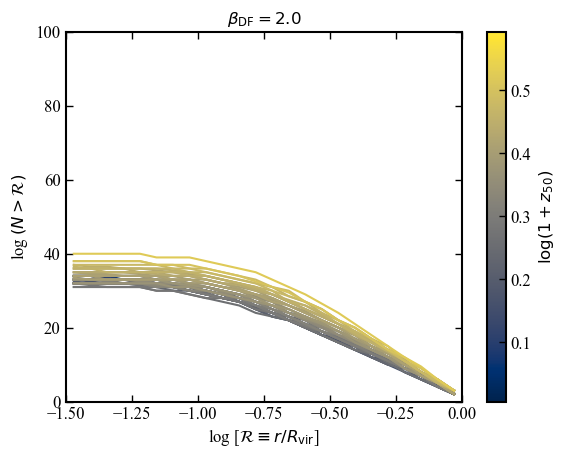

In [117]:
radial_distribution(S0_up, N_chunk=50, label="$\\beta_{\\rm DF} = 2.0$")